# Marvel Comic Character Co-Occurrence Anaylisis

# 0 - Project Explanation


##0.1 - What is it?

This project uses a pre-prepared dataset (an adjacency list) containing the appearances of a Marvel comic character in the comics of other characters.
With this dataset, it is possible to identify which characters have the greatest participation in general, as well as generate other insights that will be verified in this project.

## 0.2 - Nodes and Edges

### **0.2.1 - Graph Type:** Undirected



### **0.2.2 - Nodes:** The nodes of this project are characters from Marvel comics.

### **0.2.3 - Edges**

**The edges indicate that:** The character appears in the same comic as your connection (vice versa) / Both participated in the same comic

Ex: *Captain America and Spiderman appear together in an Avengers comic book*

## 0.3 - Author and Credits

###**Author:** Henry Medeiros
### **Project Repository:** https://github.com/henrymedeiros/network-analysis-project
###**Dataset:** https://github.com/gephi/gephi/wiki/Datasets  [(The Marvel Social Network)](https://gephi.org/datasets/hero-social-network.gephi))


#1 - Requirements

In [1]:
pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 103.9 MB/s eta 0:00:00


In [2]:
pip install networkx[default]

In [3]:
pip install nxviz

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict
import networkx as nx
import nxviz as nxv
import community
from google.colab import files

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


#2 - Dataset loading and configurations

In [5]:
import pandas as pd

# DATAFRAME OPTIONS
df = pd.read_csv('https://raw.githubusercontent.com/henrymedeiros/network-analysis-project/main/source.csv')
df.columns = ['character_1','character_2']
df.head(10)



,character_1,character_2
0,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
1,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
2,"LITTLE, ABNER",PRINCESS ZANDA
3,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
4,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
5,"STEELE, SIMON/WOLFGA","FORTUNE, DOMINIC"
6,"STEELE, SIMON/WOLFGA","ERWIN, CLYTEMNESTRA"
7,"STEELE, SIMON/WOLFGA",IRON MAN/TONY STARK
8,"STEELE, SIMON/WOLFGA",IRON MAN IV/JAMES R.
9,"STEELE, SIMON/WOLFGA","RAVEN, SABBATH II/EL"


#3 - Create network

In [6]:
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML


# Create an empty graph
G = nx.Graph()

# Extract unique nodes from the adjacency list
nodes = set(df['character_1']).union(set(df['character_2']))

# Add nodes to the graph
G.add_nodes_from(nodes)
labels = {node: node for node in nodes}
nx.set_node_attributes(G, labels, 'label')

# Create edges from the adjacency list
edges = zip(df['character_1'], df['character_2'])

# Add edges to the graph
G.add_edges_from(edges)
print(G)

Graph with 6426 nodes and 167219 edges


## 3.1 - Creating subgraph based on degree

In [7]:
degree_centrality = nx.degree_centrality(G)

sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

top_nodes = sorted_nodes[:100]

# Create a subgraph with only the top nodes and their neighbors
top_100_subgraph = G.subgraph(top_nodes)
print(top_100_subgraph.nodes())

['CAPTAIN AMERICA', 'WOLFSBANE/RAHNE SINC', 'PUNISHER II/FRANK CA', 'COOPER, DR. VALERIE', 'JARVIS, EDWIN ', 'NELSON, FRANKLIN FOG', 'FURY, COL. NICHOLAS ', 'HERCULES [GREEK GOD]', 'VISION ', 'BEAST/HENRY &HANK& P', 'SUMMERS, NATHAN CHRI', 'HAWK', 'IRON MAN/TONY STARK ', 'BANSHEE/SEAN CASSIDY', 'TIGRA/GREER NELSON', 'MOCKINGBIRD/DR. BARB', 'RICHARDS, FRANKLIN B', 'POLARIS/LORNA DANE', 'QUASAR III/WENDELL V', 'SERSI/SYLVIA', 'BLACK KNIGHT V/DANE ', 'JAMESON, J. JONAH', 'SUB-MARINER/NAMOR MA', 'CYCLOPS/SCOTT SUMMER', 'FALCON/SAM WILSON', 'SCARLET WITCH/WANDA ', 'MOONSTONE II/KARLA S', 'NIGHTCRAWLER/KURT WA', 'SPIDER-MAN/PETER PAR', 'MOON KNIGHT/MARC SPE', 'HULK/DR. ROBERT BRUC', 'HAVOK/ALEX SUMMERS ', 'SILVER SURFER/NORRIN', "BLACK PANTHER/T'CHAL", 'ANGEL/WARREN KENNETH', 'PARKER, MAY', 'DR. STRANGE/STEPHEN ', 'STARFOX/EROS', 'ROGUE /', 'JUSTICE II/VANCE AST', 'SHE-HULK/JENNIFER WA', 'DR. DOOM/VICTOR VON ', 'SUNSPOT/ROBERTO DACO', 'WASP/JANET VAN DYNE ', 'SHADOWCAT/KATHERINE ', 'BEETLE/A

# 4 - First Visualization

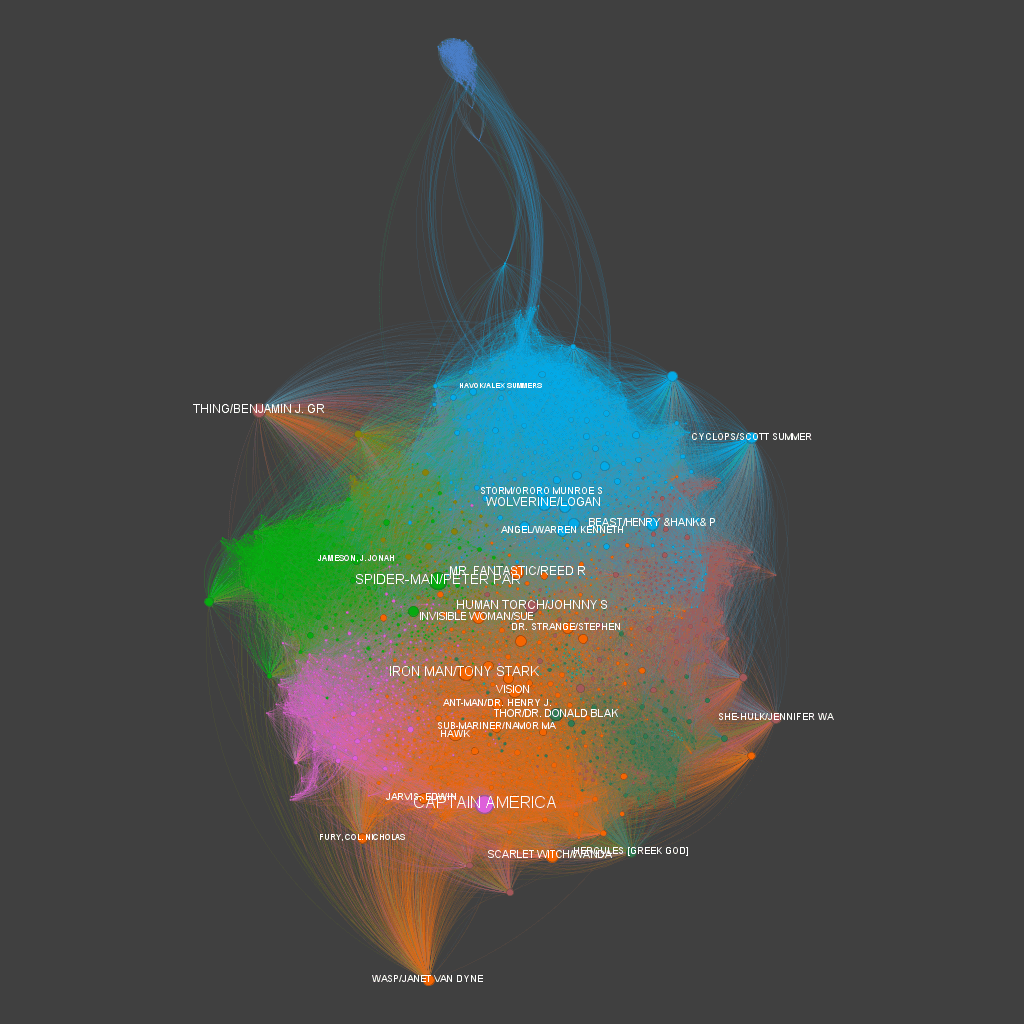

# 5 - Analysis

## 5.1 - Adjency Matrix

In [8]:
print(G.nodes())
print(nx.adjacency_matrix(G).todense())

['STRONG, SUSAN', 'JONES, AUGUSTINE', 'BURKE, JOB', 'JONES, WALTER', 'BALDWIN, JUSTIN', 'MAN-THING/THEODORE T', 'BLAKE, BECKY', 'BETELHEIM, NORMA', 'BERENGHETTI, SUSAN', 'MALICE III', 'DEMOGOBLIN', 'MARLOWE, STEVE JR.', 'PRIMUS II', 'DAVIS, ABBY', 'GIDEON, GREGORY HUNG', 'FLORES, SHANICE', 'ROM, SPACEKNIGHT', 'PRO, LE/', 'JERICHO, JUSTINA', 'JAYE-FIRESTONE, GING', 'SCORPIA', 'RUSSIAN', 'WILLIAMS, MRS.', 'ARMAND', 'WONG CHU', 'PSYCHO-MAN', 'STACY, GWEN | MUTANT', 'MOSES', 'VIGIL', 'GLEEG', 'JOYCE, SAMANTHA', 'CONQUEST/BRIDGET MAL', 'POSITRON/RONNIE', 'FIZGIG/', 'MCKENNA-DRAKE, MARLE', 'ROBERTSON, AMANDA', 'RIGHT-WINGER/JEROME ', 'MIRAGE', 'PUMA/THOMAS FIREHEAR', 'TEQUILA/', 'GROVEL', 'HOOPSNAKE/', 'REESE, MURRAY', 'BRAITHWAITE, JUDGE R', 'KORVAC, MICHAEL', 'MCKNIGHT, BOB', 'BLESSING, MORGANA', 'KNIGHT, MISTY', 'STORM, JOHNNY | MUTA', 'M-PLATE', 'GOLDFARB, AARON', "O'HOOLIHAN, SERGIUS", 'KID QUARRY', 'KRUMA, TALIA', 'TRUTH II', 'MADAME QWA', 'ARAKI II', 'DAI-KUMO', 'SLITHER', 'GLITTER/',

## 5.2.0 - Connected components subgraph of the Top 100 nodes ordered by degree

In [9]:
connected_components = list(nx.connected_components(G))

subgraph_nodes = connected_components[0]
subgraph = G.subgraph(subgraph_nodes)

degree_centrality = nx.degree_centrality(subgraph)


# Sort nodes based on degree centrality in descending order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Get top 100 nodes based on degree centrality
top_nodes = sorted_nodes[:1000]
subgraph = G.subgraph(top_nodes)

## 5.2 - Diameter

As expected, the nodes with higher degree has a low distance between any two nodes.

In [10]:
diameter = nx.diameter(subgraph)
print(subgraph)
print("Diâmetro:",diameter)
print('-------------------------------------------')


Graph with 1000 nodes and 71424 edges
Diâmetro: 3
-------------------------------------------


## 5.3 - Periphery

In [11]:


periphery = nx.periphery(subgraph)

sorted_periphery = sorted(periphery, key=lambda node: subgraph.degree[node], reverse=True)

# Imprimir os 25 nós mais periféricos
top_25_peripheral_nodes = sorted_periphery[:25]

print("Número de nós na periferia:", len(periphery))
print("Top 25 nós mais periféricos:")
for node in top_25_peripheral_nodes:
    print(node)

Número de nós na periferia: 666
Top 25 nós mais periféricos:
JARVIS, EDWIN 
STARFOX/EROS
ROBERTSON, JOE
LOKI [ASGARDIAN]
NELSON, FRANKLIN FOG
JUSTICE II/VANCE AST
DUGAN, TIMOTHY ALOYI
PHOENIX III/RACHEL S
SCREAMING MIMI/MELIS
MEPHISTO
WONG
POWER MAN/ERIK JOSTE
SANDMAN/WILLIAM BAKE
MOONSTONE II/KARLA S
IRON MAN IV/JAMES R.
ODIN [ASGARDIAN]
FANDRAL [ASGARDIAN]
HOGUN [ASGARDIAN]
KINGPIN/WILSON FISK
ENCHANTRESS/AMORA/HE
BALDER [ASGARDIAN]
SIF
KLAW/ULYSSES KLAW
WIZARD/BENTLEY WITTM
HELA [ASGARDIAN]


## 5.4 - Density and sparsity

The network is very sparse, as there are a large number of secondary characters who do not appear in more than one comic issue.

In [12]:
density = nx.density(G)

# Calcule a esparsidade da rede
sparsity = 1 - density

print("Densidade da rede:", density)
print("Esparsidade da rede:", sparsity)

Densidade da rede: 0.00810031232553549
Esparsidade da rede: 0.9918996876744645


## 5.5 - Histogram

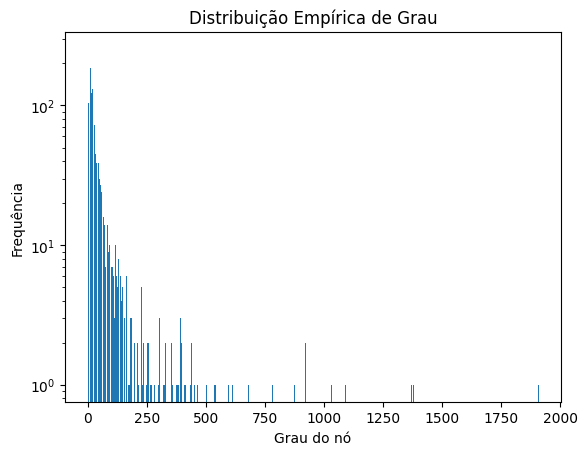

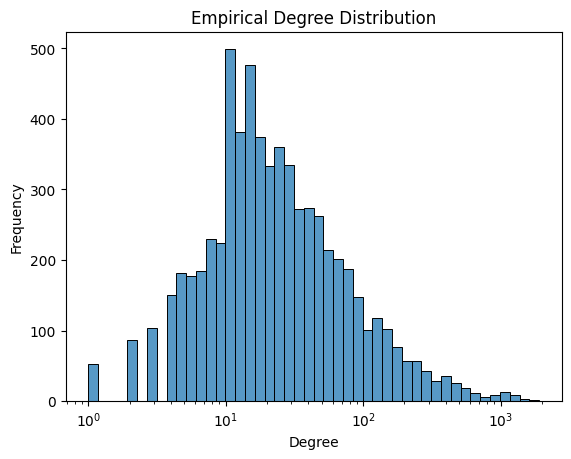

In [13]:
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
histogram = nx.degree_histogram(G)

plt.bar(range(len(histogram)), histogram)
plt.xlabel('Grau do nó')
plt.ylabel('Frequência')
plt.title('Distribuição Empírica de Grau')
plt.yscale('log')
plt.show()

degrees = [degree for _, degree in G.degree()]

unique_degrees, degree_counts = np.unique(degrees, return_counts=True)
empirical_distribution = degree_counts / sum(degree_counts)

sns.histplot(degrees, kde=False,log_scale=True)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Empirical Degree Distribution')
plt.show()

## 5.6 Centrality Measures


### 5.6.1 - Degree Centrality

In [14]:
degree_centrality = nx.degree_centrality(G)

degrees = [degree for node, degree in G.degree()]
average_degree = sum(degrees) / len(degrees)

print("Average degree: ", average_degree)


Average degree:  52.044506691565516


#### 5.6.1.1 - Visualization analysis
#### Filtrando e dando destaque para nós com grau acima de 1000
#### Algoritimo usado: Force Atlas 2 (No overlap)
#### Detecção de ilhas

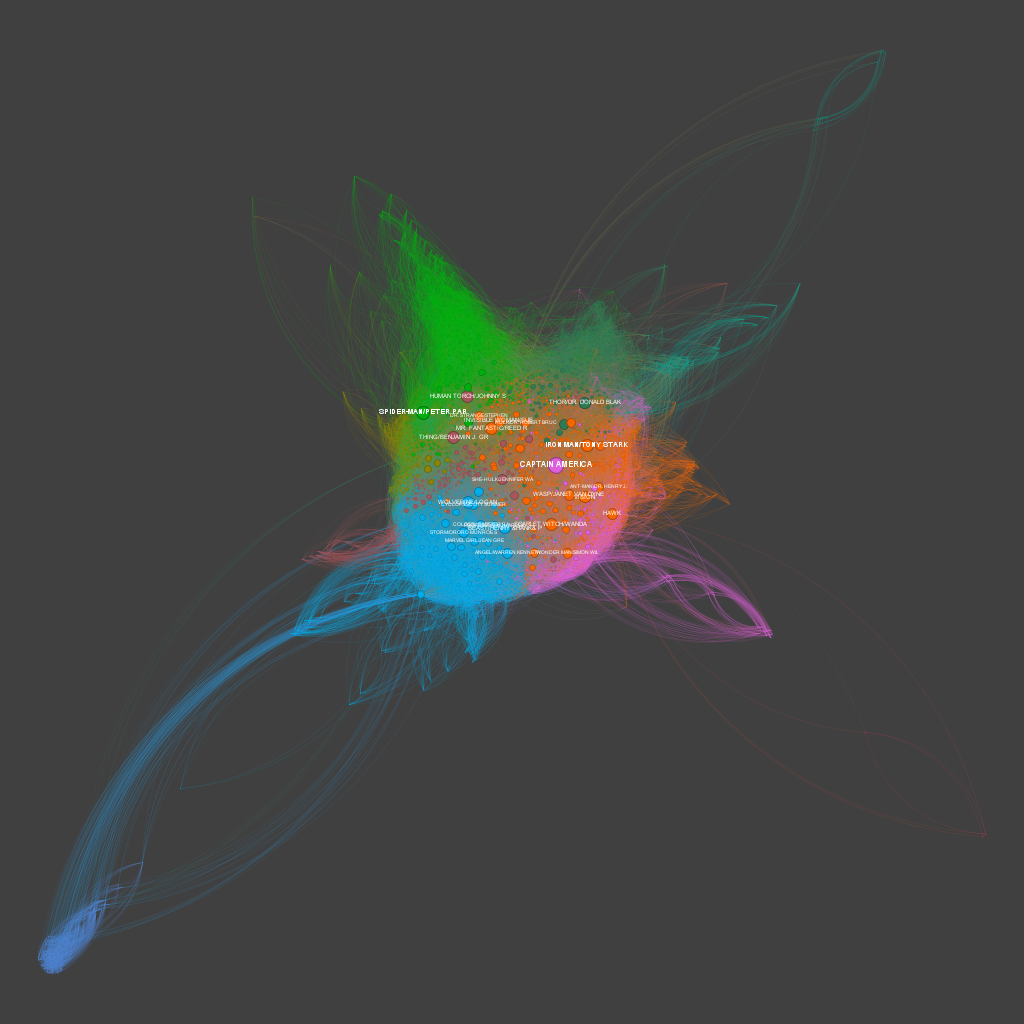

### 5.6.2 - Closeness centrality

In [15]:
#closeness = nx.closeness_centrality(G)

This shows that for any given pair of nodes in the network it can be reached relatively easily in terms of geodesic distance.

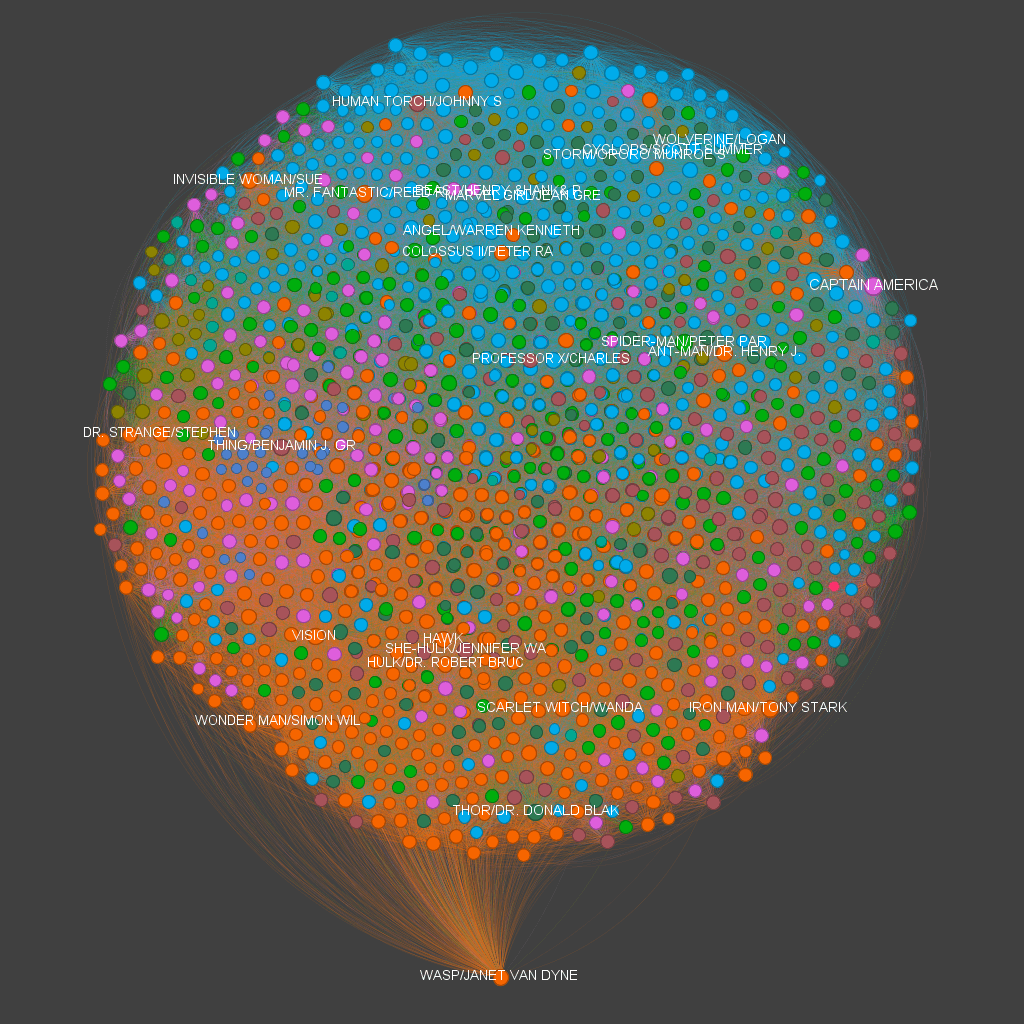

### 5.6.3 - Betweenness centrality

#### 5.6.3.1 - Visualization analysis
#### **Algoritimo usado:** Force Atlas 2 (No overlap + dissuade Hubs)
#### **Most notable briges:** Spider Man, Captain Amercia and Havok
#### Havok is an a character that appears often in two different Mutant comics, acting cleary as a bridge

In [16]:
#betweenness = nx.betweenness_centrality(G)

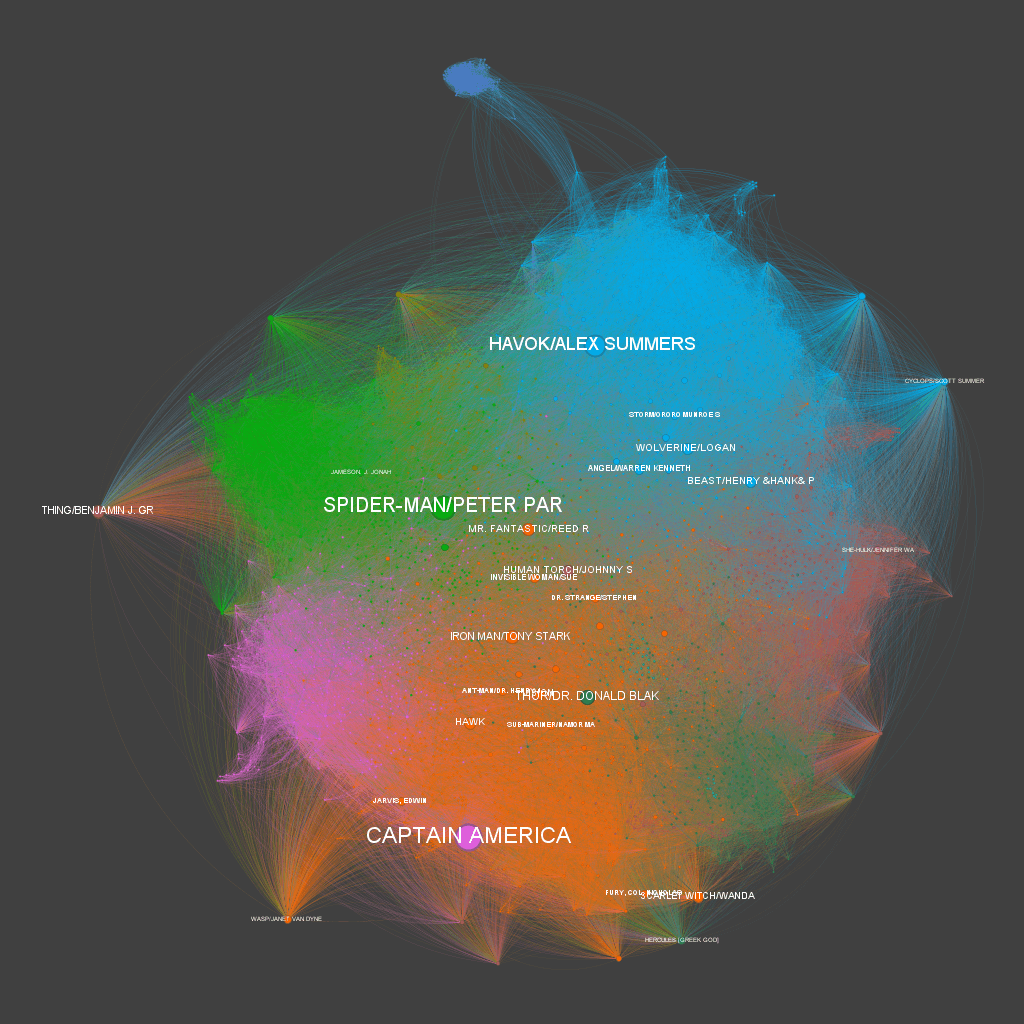

### 5.6.4 Eigenvector Centrality

In [17]:
eigenvector_centrality = nx.eigenvector_centrality(G)

#### 5.6.4.1 - Visualization Analysis
#### Eigenvector Centrality most relevant nodes.  (>= 0.75)
#### **Algoritimo usado:** Force Atlas 2 (No overlap)




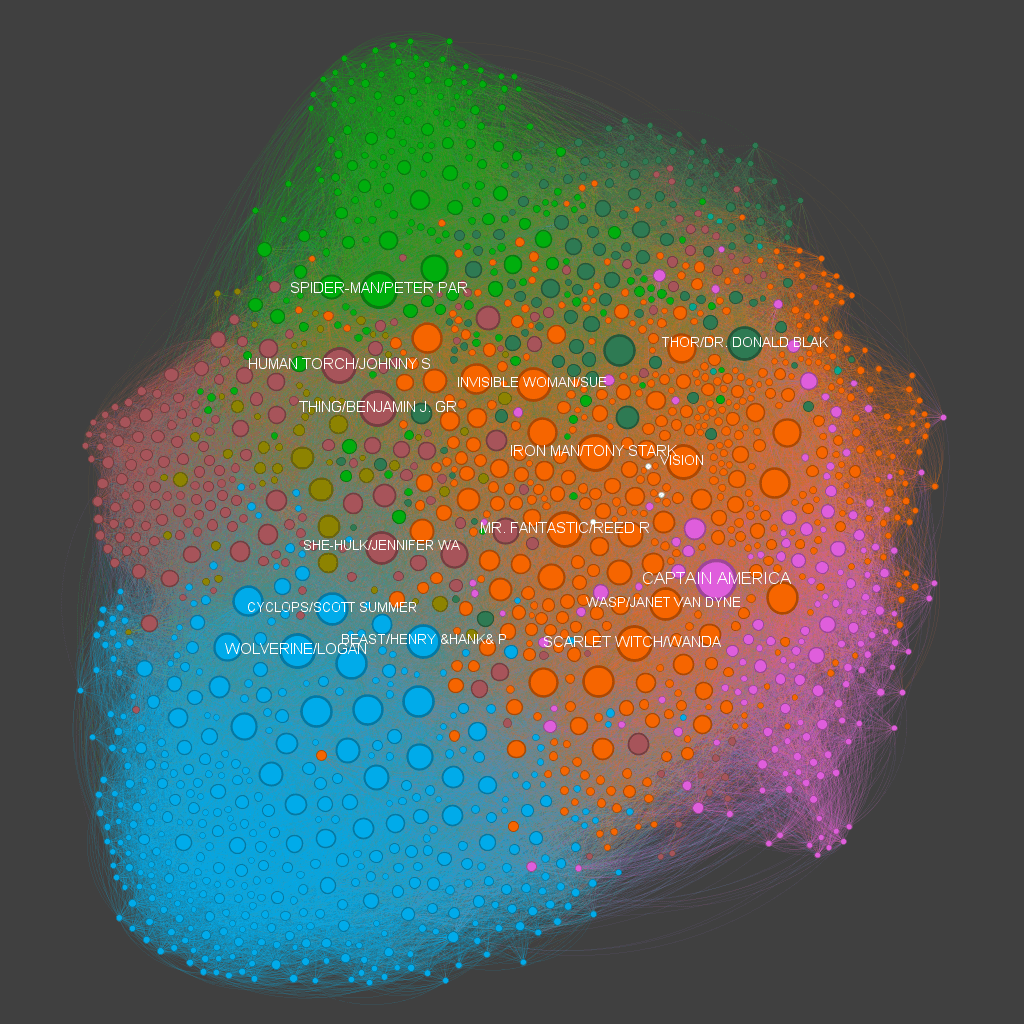

## 5.7 - General assortativity


Network with more neutral overall assortativity, where the connection between nodes is not influenced by their characteristics. Still, there is a bit of a tendency for nodes with different characteristics to connect with each other.

In [18]:
assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity)

Assortativity Coefficient: -0.16186923584815882


## 5.8 - Clusters and componentes conectados

### 5.8.1 - Local clustering coefficient for chosen nodes

**Chosen nodes:** Iron man, Captain America and Spider Man and their major villains

In [19]:
clustering_coefficients = nx.clustering(G, ['CAPTAIN AMERICA', 'IRON MAN/TONY STARK ', 'SPIDER-MAN/PETER PAR', 'RED SKULL/JOHANN SCH', 'MANDARIN', 'VENOM/EDDIE BROCK'])

print("Coeficiente de clusterização:")
for node, coefficient in clustering_coefficients.items():
    print(f"Node {node}: {coefficient}")

Coeficiente de clusterização:
Node CAPTAIN AMERICA: 0.0489946101962858
Node IRON MAN/TONY STARK : 0.062000153782221915
Node SPIDER-MAN/PETER PAR: 0.04884606915360718
Node RED SKULL/JOHANN SCH: 0.2376408831249035
Node MANDARIN: 0.3146853146853147
Node VENOM/EDDIE BROCK: 0.24048668953127553


**Insights:** Villains tend to connect with their neighbors more than heroes. Maybe to come up with some evil plan?

### 5.8.2 - Global clustering

In [20]:
global_clustering = nx.average_clustering(G)
print("Coeficiente de clustering global:", global_clustering)

Coeficiente de clustering global: 0.7746541217110623


Strong presence of clusters in the network, most nodes are interconnected. This suggests that the network well-defined communities or highly connected regions.

### 5.8.3 - Connected components

In [95]:
connected_components = list(nx.connected_components(G))

print("Número de componentes conectados:", len(connected_components))
for component in connected_components:
  print('Lenght: ', len(component))

Número de componentes conectados: 4
Lenght:  6408
Lenght:  9
Lenght:  2
Lenght:  7


# 6 - Export Data

## 6.1 - To CSV Edgelist

In [ ]:
df = nx.to_pandas_edgelist(G)
df.to_csv('graph.csv', index=False)

files.download('graph.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6.2 To GEFX

In [24]:
nx.write_gexf(G, 'graph.gexf')
files.download('graph.gexf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7 - Conclusion

In general, it was possible to explore through the analysis of very interesting characteristic networks about the ecosystem of Marvel comic characters.


* It became clear that there are groups of characters that appear in the same comics on a recurring basis (Avengers, X-Men, Fantastic Four)

* It became clear which characters have the most influence and are most relevant

* It was clear that some characters have particular characteristics, for example, acting as a recurring participant in two communities

* It became clear that if you collect several random comics, it won't take long for a specific character to appear (closeness centrality)

* It was clear that there are many characters that appear a modest number of times compared to the main ones (average degree)

* And many other stuff...